In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   ## SES
from statsmodels.tsa.holtwinters import Holt   # holt exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
Walmart = pd.read_csv("D:\\DATA_science\\Data_sets\\Forcasting\\footfalls.csv")

<AxesSubplot:>

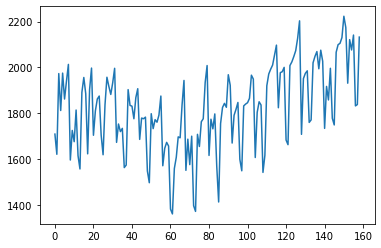

In [4]:
Walmart.Footfalls.plot()

### Splitting Data

In [5]:
Train = Walmart.head(147)
Test = Walmart.tail(12)

### Moving Average

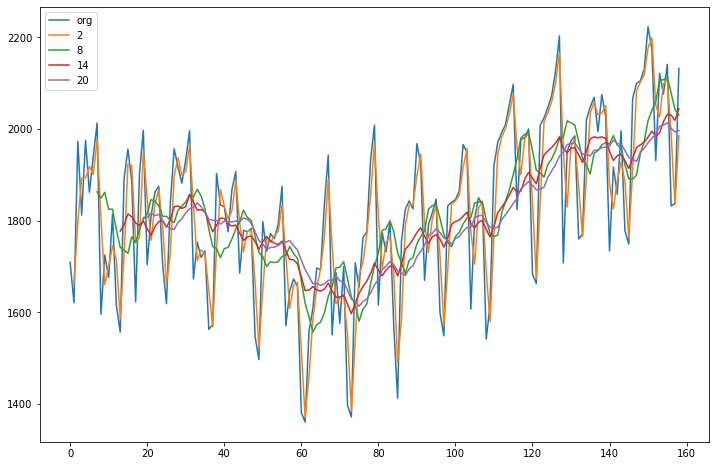

In [7]:
plt.figure(figsize = (12, 8))
Walmart.Footfalls.plot(label = 'org')
for i in range(2, 24, 6):
    Walmart['Footfalls'].rolling(i).mean().plot(label = str(i))
plt.legend(loc = 'best')
plt.show()

### Time Series Decomposition Plot

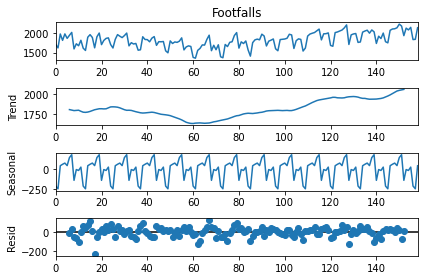

In [8]:
decompose_ts_add = seasonal_decompose(Walmart.Footfalls, period = 12)
decompose_ts_add.plot()
plt.show()

### ACF plots and PACF plots

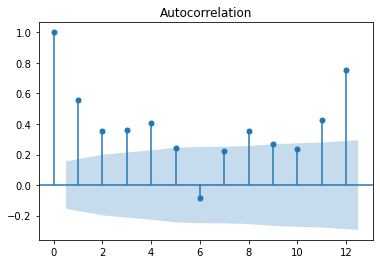

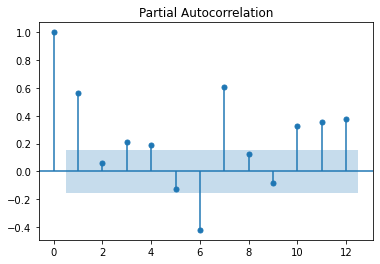

In [9]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Walmart.Footfalls, lags = 12)
tsa_plots.plot_pacf(Walmart.Footfalls, lags = 12)
plt.show()

### Evaluation Metric MAPE

In [10]:
def MAPE(pred, org):
    temp = np.abs((pred - org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [11]:
ses_Model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level = 0.2)
pred_ses = ses_Model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_ses, Test.Footfalls)

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


8.490637057828362

### Holt Method

In [12]:
hw_model = Holt(Train['Footfalls']).fit(smoothing_level = 0.8, smoothing_slope = 0.2 )
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hw, Test.Footfalls)

<ipython-input-12-6c49572872dd>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train['Footfalls']).fit(smoothing_level = 0.8, smoothing_slope = 0.2 )


7.546249229496066

### Holts winter exponential smoothing with additive seasonality and additive trend

In [13]:
hwe_model_add_add = ExponentialSmoothing(Train['Footfalls'], seasonal = 'add', trend = 'add', seasonal_periods = 12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwe_add_add, Test.Footfalls)

3.7505010397295067

### Holt winter exponential smoothing with multiplicative seasonality and additive trend

In [15]:
hwe_model_mul_add = ExponentialSmoothing(Train['Footfalls'], seasonal = 'mul', trend = 'add', seasonal_periods = 12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwe_mul_add, Test.Footfalls)

3.939821065755419

### Final Model by Combining Train and Test

In [18]:
hwe_model_add_add = ExponentialSmoothing(Walmart['Footfalls'], seasonal = 'add', trend = 'add', seasonal_periods = 12).fit()

In [19]:
## Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

159    2159.049612
160    2184.181287
161    2175.047623
162    2259.531412
163    2274.782926
164    1973.579880
165    2149.808584
166    2125.710663
167    2174.849726
168    1909.325993
dtype: float64